In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import  models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_size = 224
channels = 3



In [6]:
training_data = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip=True,
    rotation_range = 10


)

train_gen = training_data.flow_from_directory(
    'Gho_classification/train',
    target_size = (image_size,image_size),
    batch_size = 16,
    class_mode = 'sparse'
    

)

Found 1016 images belonging to 5 classes.


In [7]:
val_data = ImageDataGenerator(
    rescale = 1.0 / 255,
    horizontal_flip= True,
    rotation_range= 10,
    

)

val_gen = val_data.flow_from_directory(
    'Gho_classification/val',
    target_size=(image_size,image_size),
    batch_size=16,
    class_mode='sparse'

)

Found 125 images belonging to 5 classes.


In [9]:
test_data = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10

)
test_gen = test_data.flow_from_directory(
    'Gho_classification/test',
    target_size=(image_size, image_size),
    batch_size = 16,
    class_mode='sparse'
)

Found 131 images belonging to 5 classes.


In [10]:
print(train_gen.class_indices)

{'Hotra': 0, 'Mathra': 1, 'Mentha': 2, 'Pangtsi': 3, 'Satra': 4}


In [14]:
class_names = list(train_gen.class_indices.keys())
class_names

['Hotra', 'Mathra', 'Mentha', 'Pangtsi', 'Satra']

In [29]:
input_shape = (image_size,image_size,channels)
class_labels = 5

model = models.Sequential([
    
    layers.InputLayer(input_shape = input_shape),
    # first layers of cnn
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    # second layers of cnn
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # third layers of cnn
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #fouth layers of cnn
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #flatten layers
    layers.Flatten(),
    
    #dense layers
    layers.Dense(64, activation= 'relu'),
    
    #out put layers
    layers.Dense(class_labels, activation='softmax'),
    
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 64)      

In [33]:

#hyperparameters
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']


)

In [35]:
1016/16
125/16

7.8125

In [36]:
history = model.fit(
    
    
    train_gen,
    steps_per_epoch= 63,
    batch_size=16,
    validation_data=val_gen,
    validation_steps=7,
    verbose = 1,
    epochs = 10
        
    

)

Epoch 1/10
63/63 [==============================] - 64s 989ms/step - loss: 1.1492 - accuracy: 0.5180 - val_loss: 0.5468 - val_accuracy: 0.8304
Epoch 2/10
63/63 [==============================] - 56s 888ms/step - loss: 0.4477 - accuracy: 0.8240 - val_loss: 0.6569 - val_accuracy: 0.8571
Epoch 3/10
63/63 [==============================] - 56s 888ms/step - loss: 0.3444 - accuracy: 0.8650 - val_loss: 0.1400 - val_accuracy: 0.9554
Epoch 4/10
63/63 [==============================] - 56s 886ms/step - loss: 0.1923 - accuracy: 0.9240 - val_loss: 0.0635 - val_accuracy: 0.9821
Epoch 5/10
63/63 [==============================] - 56s 881ms/step - loss: 0.2001 - accuracy: 0.9250 - val_loss: 0.0260 - val_accuracy: 0.9911
Epoch 6/10
63/63 [==============================] - 56s 881ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.2352 - val_accuracy: 0.9554
Epoch 7/10
63/63 [==============================] - 56s 877ms/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.0987 - val_accuracy: 0.9643

In [37]:
 score = model.evaluate(test_gen)

9/9 [==============================] - 3s 356ms/step - loss: 0.0046 - accuracy: 1.0000


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss vs Validation loss')

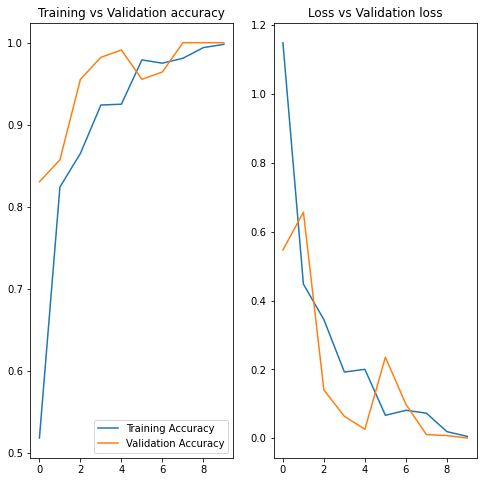

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = 10
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs),val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training vs Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Loss')
plt.plot(range(epochs),val_loss,label = 'Validation loss')
plt.title('Loss vs Validation loss')


first image to predict
actual label: Mentha
predicted label: Mentha


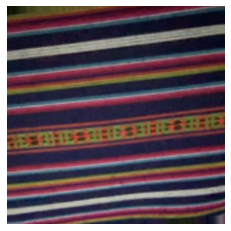

In [43]:
import numpy as np


for image_batch, label_batch in test_gen:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

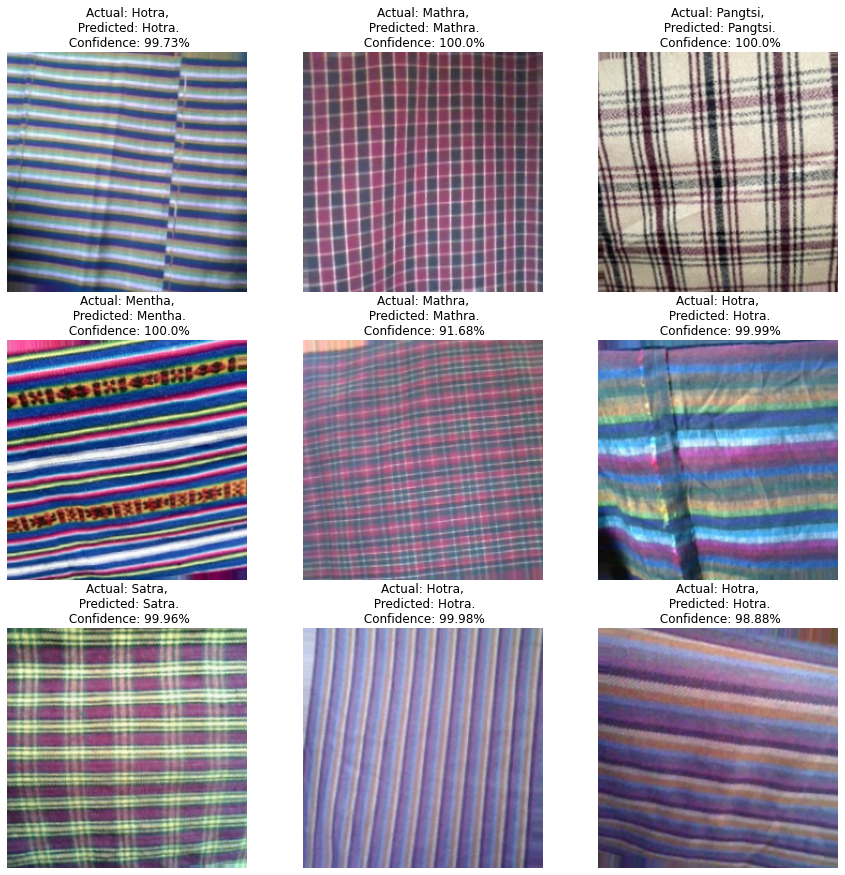

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_gen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [49]:
model.save('gho.h5')